In [13]:
'''
Author        : Aditya Jain
Date Started  : 17th September, 2021
About         : This script explores localization with background subtraction; using otsu, local based thresholding directly on the image
'''
import cv2
import os
import json
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path
sys.path.append('Users/adijain0707/data/maxim_videos/maxim_video1.MOV')

from skimage import data
from skimage.filters import try_all_threshold

SCALE_PER       = 0.7    # scaling of the image
NOISE           = 15     # noise factor for removal
AREA_THRESHOLD  = 0.05   # in percentage

path            = 'Users/adijain0707/data/maxim_videos/'
vid_path        = 'maxim_video1.MOV'

In [18]:
def frames_from_video(video_path, des_fps):
    ''' 
    Given a video, prepares the final downsized concatenated image for training
    Arguments:
    video_path: the file path of video
    n_frames  : no of frames to sample from the video at equal intervals
    down_f    : downscaling factor for the image
    '''
    
    vidcap      = cv2.VideoCapture(video_path)     
    fps         = vidcap.get(cv2.CAP_PROP_FPS)           #  FPS of the video 
    print(video_path)
    print(fps)
    frame_count = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)   #  total frame count
    total_sec   = frame_count/fps
    sec         = 0
    n_frames    = total_sec*des_fps
    time_sec    = total_sec/n_frames                     # the video will be sampled after every time_sec
        
    while sec < total_sec:        
        vidcap.set(cv2.CAP_PROP_POS_MSEC, sec * 1000)    # setting which frame to get        
        success, image = vidcap.read()        
        
        if success:
            image   = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return image
            
        sec += time_sec        

maxim_video1.MOV
60.089020771513354


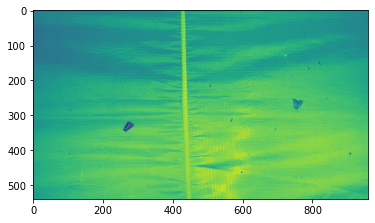

In [20]:
image = frames_from_video(vid_path, 5)
plt.imshow(image)

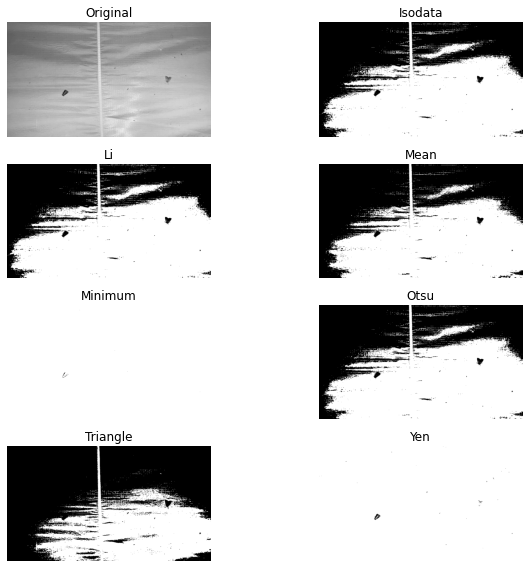

In [21]:
fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()

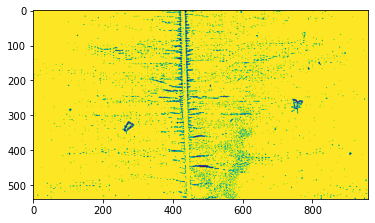

In [30]:
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local

block_size = 21
adaptive_thresh = threshold_local(image, block_size, offset=10)
binary_adaptive = image > adaptive_thresh

plt.imshow(binary_adaptive)

In [12]:
# Testing
# import torchvision
imagenet_data = datasets.ImageNet('Users/adijain0707/data/')


AttributeError: module 'torchvision.datasets' has no attribute 'ImageNet'

In [3]:
torchvision.__version__

'0.10.0'

In [2]:
import torchvision
import torchvision.datasets as datasets
imagenet_data = datasets.ImageNet('Users/adijain0707/data/')

RuntimeError: The archive ILSVRC2012_devkit_t12.tar.gz is not present in the root directory or is corrupted. You need to download it externally and place it in Users/adijain0707/data/.

In [4]:
import torch

In [5]:
torch.__version__

'1.9.0'